# Manually check how clean are the ASR outputs


In [1]:
import matplotlib
#matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import mne
import numpy as np
import pandas as pd

# Compare averaged epochs  unclean and clean for each subject and block

In [2]:
preprocessing_output = """Subject: P001 Block: 1 Report: ok
Subject: P001 Block: 2 Report: ok
Subject: P001 Block: 3 Report: ok
Subject: P002 Block: 1 Report: ok
Subject: P002 Block: 2 Report: ok
Subject: P002 Block: 3 Report: ok
Subject: P002 Block: 4 Report: ok
Subject: P002 Block: 5 Report: ok
Subject: P002 Block: 6 Report: ok
Subject: P003 Block: 1 Report: ok
Subject: P003 Block: 2 Report: ok
Subject: P003 Block: 3 Report: ok
Subject: P003 Block: 4 Report: ok
Subject: P003 Block: 5 Report: ok
Subject: P003 Block: 6 Report: ok
Subject: P004 Block: 1 Report: skipped
Subject: P004 Block: 2 Report: ok
Subject: P004 Block: 3 Report: ok
Subject: P004 Block: 4 Report: ok
Subject: P004 Block: 5 Report: ok
Subject: P004 Block: 6 Report: ok"""

P001 1


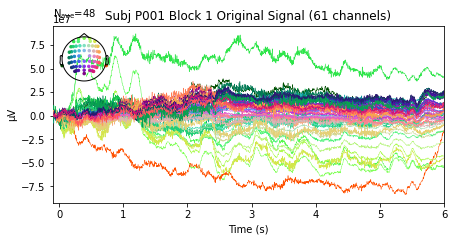

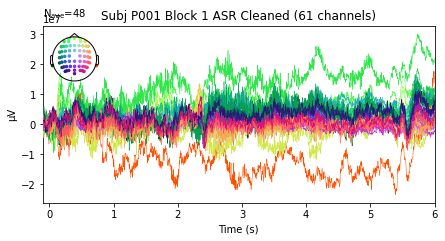

P001 2


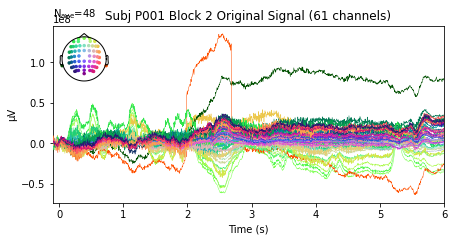

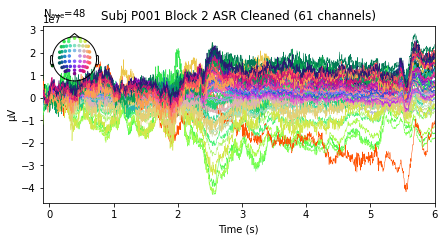

P001 3


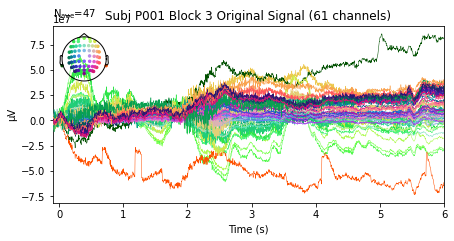

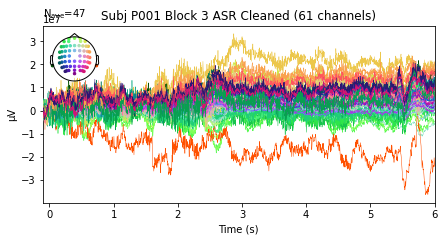

P002 1


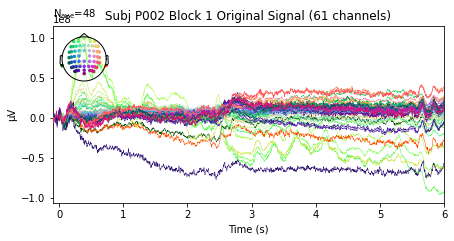

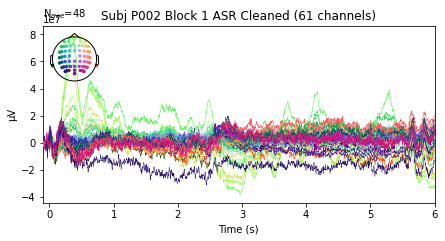

P002 2


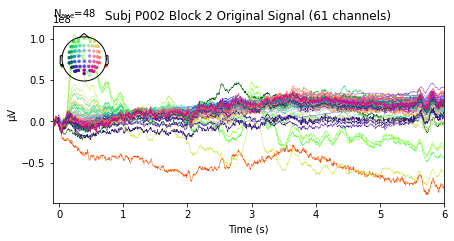

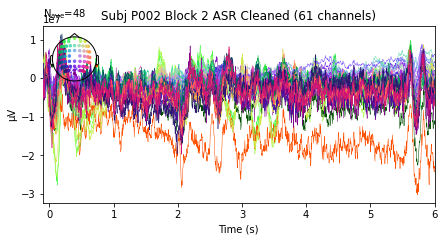

P002 3


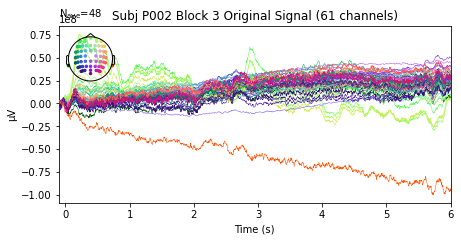

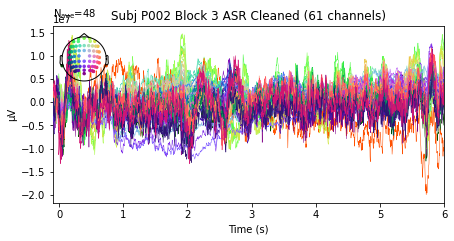

P002 4


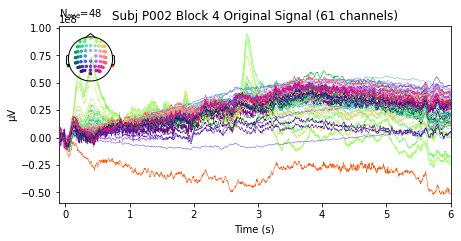

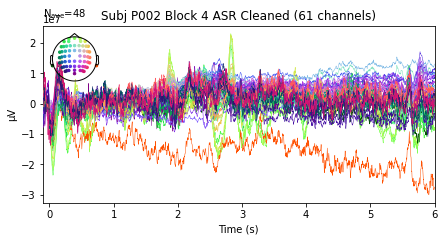

P002 5


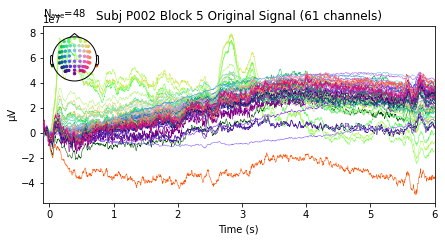

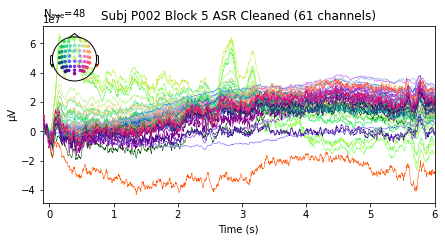

P002 6


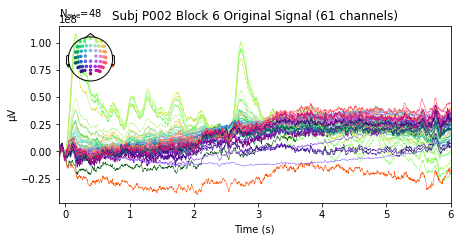

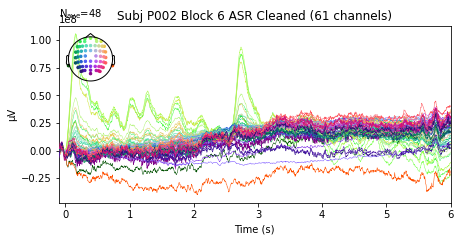

P003 1


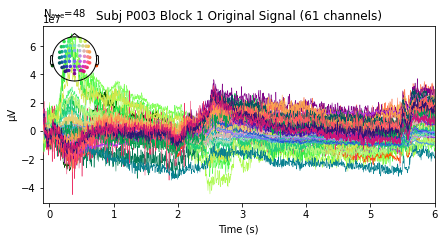

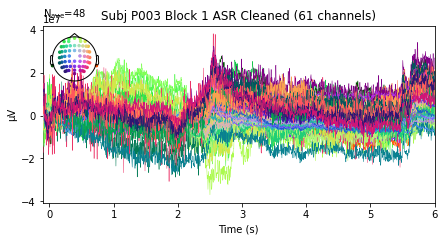

P003 2


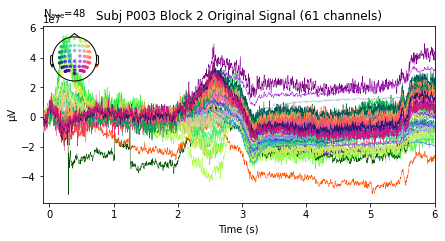

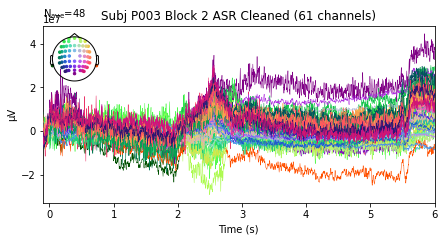

P003 3


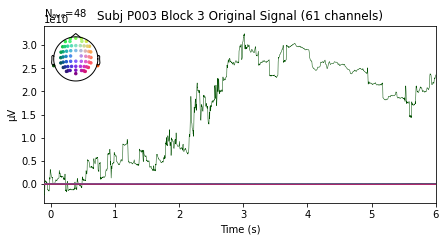

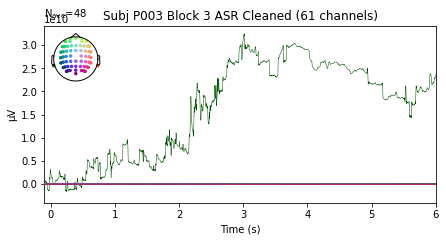

P003 4


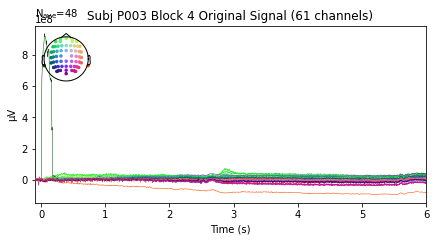

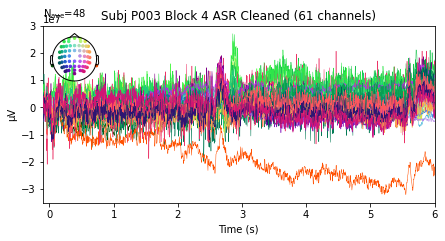

P003 5


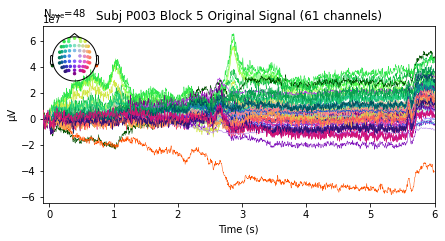

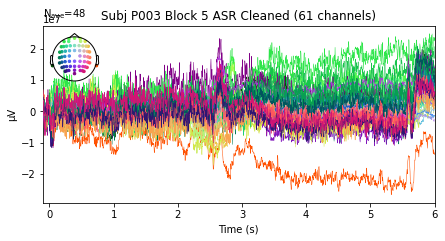

P003 6


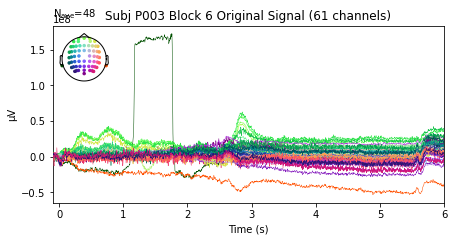

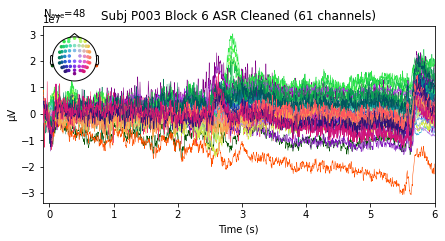

P004 2


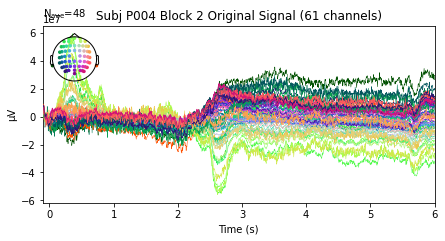

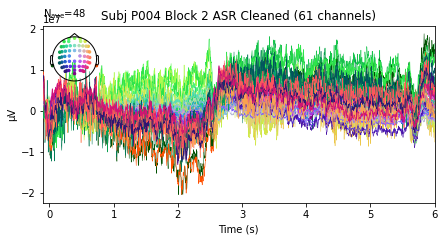

P004 3


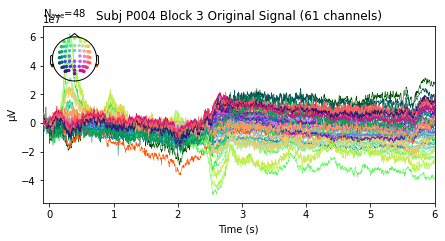

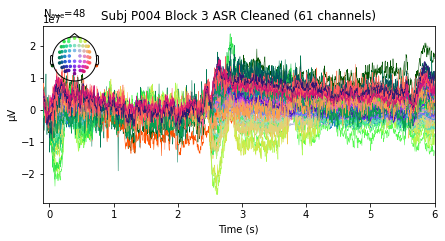

P004 4


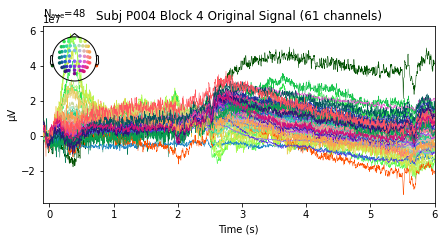

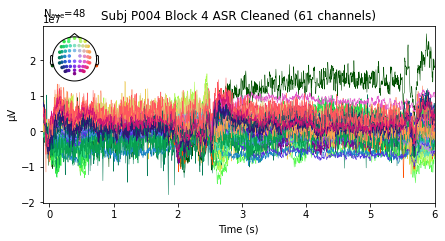

P004 5


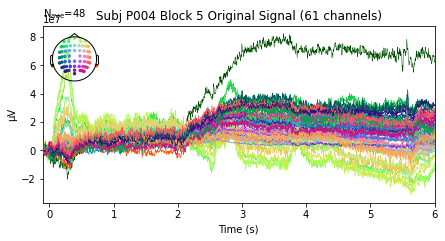

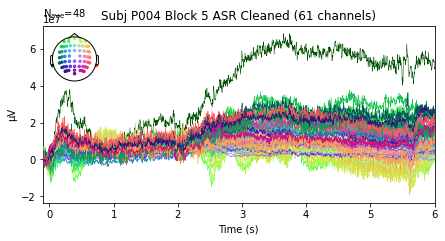

P004 6


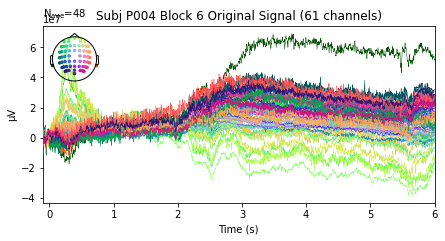

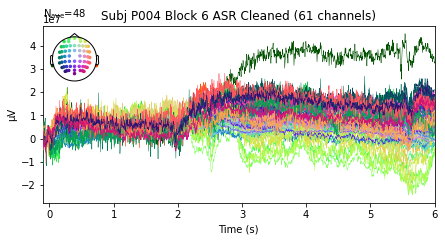

In [20]:
for line in preprocessing_output.split("\n"):
    tmpl = line.split(" ")
    if tmpl[-1] == 'ok':
        print(tmpl[1],tmpl[3])
        clean = f"/net/store/nbp/projects/GTI_decoding/data/pilot/01_subjects_data/{tmpl[1]}/eeg/preprocessed/02_epoched/block_{tmpl[3]}_epo.fif"
        unclean = f"/net/store/nbp/projects/GTI_decoding/data/pilot/01_subjects_data/{tmpl[1]}/eeg/preprocessed/99_uncleanepochs/block_{tmpl[3]}_epo.fif"
        cleanepoch = mne.read_epochs(clean, preload=False,verbose=False)
        uncleanepoch = mne.read_epochs(unclean, preload=False,verbose=False)
        uncleanepoch.average().plot(spatial_colors=True, titles="Subj {} Block {} Original Signal".format(tmpl[1],tmpl[3]))
        cleanepoch.average().plot(spatial_colors=True, titles="Subj {} Block {} ASR Cleaned".format(tmpl[1],tmpl[3]))
        plt.show()

# Check specific subject and specific block

In [3]:
colors = ["blue","green", "red", "cyan", "magenta", "yellow", "orange", "steelblue"]
color_map = {i+1:c for i,c in enumerate(colors)}

#Enter the subject id and the block id below

In [4]:
subject_id = "P002" #the subject id to check
block_id = "3" # the block number to check
#remember to uncomment the line below to scroll through all epochs 

#%matplotlib qt 

UNCLEAN SIGNAL


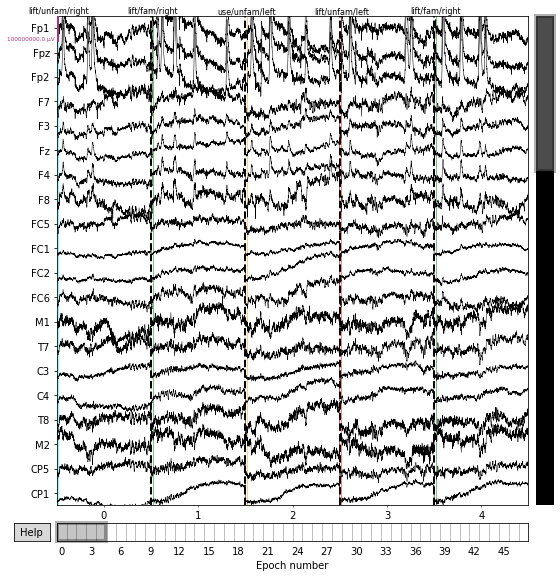

ASR CLEANED


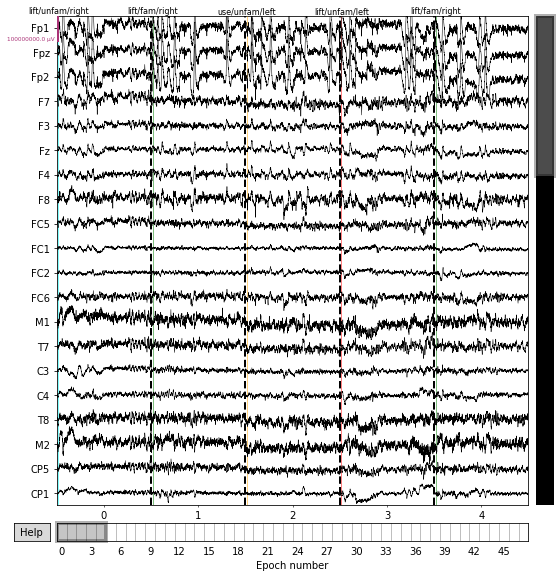

In [18]:
clean = f"/net/store/nbp/projects/GTI_decoding/data/pilot/01_subjects_data/{subject_id}/eeg/preprocessed/02_epoched/block_{block_id}_epo.fif"
unclean = f"/net/store/nbp/projects/GTI_decoding/data/pilot/01_subjects_data/{subject_id}/eeg/preprocessed/99_epochs_raw/block_{block_id}_epo.fif"

cleanepoch = mne.read_epochs(clean, preload=False,verbose=False)
uncleanepoch = mne.read_epochs(unclean, preload=False,verbose=False)
print("UNCLEAN SIGNAL")
uncleanepoch.plot(n_epochs=5,
            scalings=dict(eeg=50),
            events=uncleanepoch.events,
            event_id=uncleanepoch.event_id,
            event_color=color_map)
print("ASR CLEANED")
cleanepoch.plot(n_epochs=5,
            scalings=dict(eeg=50),
            events=cleanepoch.events,
            event_id=cleanepoch.event_id,
            event_color=color_map)
plt.show()
